In [1]:
# Imports
import massimal.annotation
from pathlib import Path
import json
import skimage.io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Paths
rgb_im_dir = Path("/home/mha114/data/massimal/vega_sola/hyperspec/annotation/rgb_images/")
test_dir = Path("/home/mha114/data/massimal/vega_sola/hyperspec/annotation/v2.1/png_gray/test/")
train_val_dir = Path("/home/mha114/data/massimal/vega_sola/hyperspec/annotation/v2.1/png_gray/train_val/")
class_index_json = Path("/home/mha114/data/massimal/vega_sola/hyperspec/annotation/v2.1/png_gray/label_classes.json")
class_hierarchy_json = Path("/home/mha114/code/github/massimal/annotation/massimal_annotation_class_hierarchy.json")

In [3]:
# Load and print annotation classes 
class_indices = massimal.annotation.read_hasty_metadata(class_index_json)
for key in class_indices.keys():
    print(f'{key}: {class_indices[key]}')

Deep water: 1
Substrate: 2
Rock: 3
Bedrock: 4
Boulder: 5
Cobble: 6
Gravel: 7
Sediment: 8
Sand: 9
Mud: 10
Algae: 11
Brown algae: 12
Kelp: 13
Laminaria hyperborea: 14
Laminaria digitata: 15
Sacchoriza polyides: 16
Saccharina latissima: 17
Alaria esculenta: 18
Rockweed: 19
Rockweed, hydrolittoral: 20
Ascophyllum nodosum: 21
Fucus vesiculosus: 22
Fucus serratus: 23
Halidrys siliquosa: 24
Rockweed, geolittoral: 25
Fucus spiralis: 26
Pelvetia canaliculata: 27
Brown algae, other: 28
Chorda filum: 29
Desmarestia aculeata: 30
Red algae: 31
Coralline algae: 32
Maerl: 33
Green algae: 34
Turf: 35
Animals: 36
Mussels: 37
Mytilus edilus: 38
Trawl track: 39


In [4]:
# Load class hierarchy
with open(class_hierarchy_json,'r') as file:
    class_hierarchy = json.load(file)
print(class_hierarchy)

{'Deep water': [], 'Algae': {'Brown algae': {'Kelp': ['Laminaria hyperborea', 'Laminaria digitata', 'Sacchoriza polyides', 'Saccharina latissima', 'Alaria esculenta'], 'Rockweed': {'Rockweed, hydrolittoral': ['Ascophyllum nodosum', 'Fucus vesiculosus', 'Fucus serratus', 'Halidrys siliquosa'], 'Rockweed, geolittoral': ['Fucus spiralis', 'Pelvetia canaliculata']}, 'Brown algae, other': ['Chorda filum', 'Desmarestia aculeata']}, 'Red algae': {'Coralline algae': ['Maerl']}, 'Green algae': [], 'Turf': []}, 'Substrate': {'Rock': ['Bedrock', 'Boulder', 'Cobble', 'Gravel'], 'Sediment': ['Sand', 'Mud']}, 'Animals': {'Mussels': ['Mytilus edilus']}, 'Human activity': ['Trawl track']}


In [5]:
# Define grouped classes
grouped_classes = ['Sand','Bedrock','Cobble','Maerl','Rockweed','Kelp','Chorda filum']
grouped_class_indices = massimal.annotation.class_indices_from_hierarchy(class_hierarchy,class_indices,grouped_classes)
grouped_class_indices['Brown algae, unspec.'] = {class_indices['Brown algae']}
print(grouped_class_indices)

{'Sand': {9}, 'Bedrock': {4}, 'Cobble': {6}, 'Maerl': {33}, 'Rockweed': {19, 20, 21, 22, 23, 24, 25, 26, 27}, 'Kelp': {13, 14, 15, 16, 17, 18}, 'Chorda filum': {29}, 'Brown algae, unspec.': {12}}


In [6]:
# Show training data
# for image_file in sorted(train_val_dir.glob('*.png')):
#     fig,ax = plt.subplots(ncols=2,figsize=(8,6))
#     rgb_image_file = rgb_im_dir / image_file.name
#     rgb_image = skimage.io.imread(rgb_image_file)
#     ann_image = skimage.io.imread(image_file)
#     ax[0].imshow(rgb_image)
#     ax[1].imshow(ann_image)
#     plt.show()

In [8]:
# Count number of samples for each class
sample_count = {group_name:0 for group_name in grouped_class_indices.keys()}

for image_file in sorted(train_val_dir.glob('*.png')):
    class_map = skimage.io.imread(image_file)
    group_map, group_indices = massimal.annotation.class_map_for_grouped_indices(
        class_map,
        grouped_class_indices)
    # print(f'{np.max(group_mask)=}')
    # print(group_indices)
    for group_name in sample_count:
        sample_count[group_name] += np.count_nonzero(group_map==group_indices[group_name])  
print(sample_count)

{'Sand': 8779702, 'Bedrock': 4965391, 'Cobble': 2433649, 'Maerl': 9193526, 'Rockweed': 4464956, 'Kelp': 1287014, 'Chorda filum': 2060716, 'Brown algae, unspec.': 7609744}


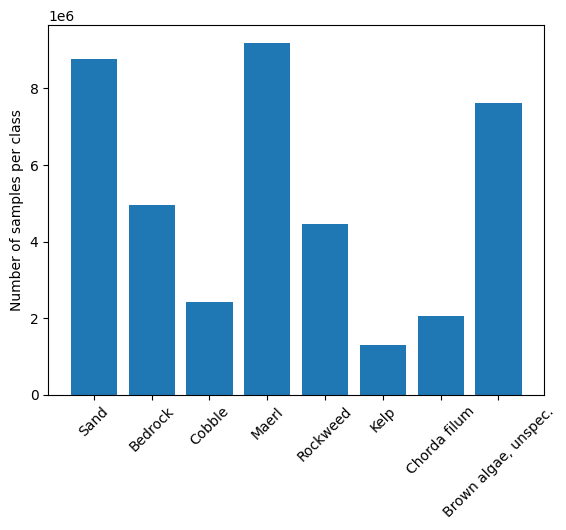

In [9]:
x_bar_samples = np.arange(len(sample_count))
plt.bar(x_bar_samples,sample_count.values())
plt.xticks(x_bar_samples,sample_count.keys(),rotation=45)
plt.ylabel('Number of samples per class')
plt.show()